# METBK Intercomparison (Irminger 12)

## Graphs

In [2]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
from utils import Ship, Buoy, md2vect, vect2md, bpr_adjust, rh2q
import matplotlib.dates as mdates

In [4]:
ship = Ship()
sumo11 = Buoy()
sumo12 = Buoy()

### Data read-ins

In [5]:
# ship
ship_data = pd.read_csv("ship_files/merged_dcc.csv")

# recovered buoy
sumo11.metbk1 = pd.read_csv("buoy_files/R_metbk1_20250718_20250807.csv")
sumo11.metbk2 = pd.read_csv("buoy_files/R_metbk2_20250718_20250807.csv")

# deployed buoy
sumo12.metbk1 = pd.read_csv("buoy_files/D_metbk1_20250718_20250807.csv")
sumo12.metbk2 = pd.read_csv("buoy_files/D_metbk2_20250718_20250807.csv")

In [6]:
# make the datetime col an index 

def set_datetime_index(df):
    """
    Convert the existing 'datetime' column to UTC datetime index.
    """
    df = df.copy()
    df["datetime"] = pd.to_datetime(df["datetime"], utc=True)
    df = df.set_index("datetime").sort_index()
    return df

# recovered buoy
sumo11.metbk1 = set_datetime_index(sumo11.metbk1)
sumo11.metbk2 = set_datetime_index(sumo11.metbk2)

# deployed buoy
sumo12.metbk1 = set_datetime_index(sumo12.metbk1)
sumo12.metbk2 = set_datetime_index(sumo12.metbk2)

In [7]:
sumo12.metbk2

,BP_mbar,RH_pct,RH_T_degC,LWR_W_m2,PRC_mm,SeaT_degC,Cond_S_m,SWR_W_m2,We_m_s,Wn_m_s,Bat1_V,Bat2_V,source_file
datetime,,,,,,,,,,,,,
2025-07-18 00:00:00.618000+00:00,1008.88,88.619,13.622,368.0,9.06,13.659,0.0000,9.3,-1.43,-0.02,0.0000,12.5,20250718.metbk2.log
2025-07-18 00:01:04.954000+00:00,1008.88,88.633,13.622,368.0,9.03,13.650,0.0000,9.2,-1.42,0.05,0.0000,12.5,20250718.metbk2.log
2025-07-18 00:02:09.421000+00:00,1008.88,88.670,13.622,367.5,9.05,13.652,0.0000,9.2,-1.39,0.01,0.0000,12.5,20250718.metbk2.log
2025-07-18 00:03:14.308000+00:00,1008.81,88.640,13.622,367.3,9.05,13.664,0.0000,9.2,-1.14,-0.21,0.0000,12.5,20250718.metbk2.log
2025-07-18 00:04:18.604000+00:00,1008.81,88.633,13.629,364.7,9.00,13.671,0.0000,9.2,-1.32,-0.20,0.0000,12.5,20250718.metbk2.log
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-07 23:55:32.746000+00:00,1000.88,85.031,9.880,280.1,45.26,9.662,3.7543,7.9,3.24,-8.18,3.7543,12.5,20250807.metbk2.log
2025-08-07 23:56:37.241000+00:00,1001.02,85.736,9.880,280.1,45.26,9.666,3.7546,7.9,2.66,-7.65,3.7546,12.5,20250807.metbk2.log
2025-08-07 23:57:42.008000+00:00,1000.81,85.971,9.880,280.5,45.25,9.665,3.7546,7.9,1.67,-7.15,3.7546,12.5,20250807.metbk2.log


## Shipboard met plots¶during Irminger 12 cruise
Shipboard MET plots for the time at the array (7-20-2025 - 8-4-2025) 3 seperate plots: barometric pressure, wind speed, wind direction

##### Pressure

BPB → bulk pressure;
BPZ → corrected pressure


##### Wind speed

TWB → true wind speed;
TWZ → corrected true wind speed


##### Wind direction

TIB → bulk/true wind direction;
TIZ → corrected wind direction


In [8]:
def make_datetime_index(df):
    """
    Create a datetime index from YMD (YYYYMMDD) and HMS (HHMMSS or HHMMSS.sss),
    assign it to df.index, AND keep a copy of the datetime as a column
    named 'datetime_col'.
    """

    # Convert YMD into a date string
    ymd_str = df["YMD"].astype(str)
    ymd_date = pd.to_datetime(ymd_str, format="%Y%m%d")

    # Convert HMS into hh:mm:ss.sss
    def hms_to_timestr(h):
        h = str(h)
        if "." in h:
            base, frac = h.split(".")
            base = base.zfill(6)
            hh, mm, ss = base[0:2], base[2:4], base[4:6]
            return f"{hh}:{mm}:{ss}.{frac}"
        else:
            h = h.zfill(6)
            hh, mm, ss = h[0:2], h[2:4], h[4:6]
            return f"{hh}:{mm}:{ss}"

    time_str = df["HMS"].apply(hms_to_timestr)

    # Construct combined datetime
    combined_str = ymd_date.dt.strftime("%Y-%m-%d") + " " + time_str
    dt = pd.to_datetime(combined_str, utc=True)

    # Keep datetime as a column
    df = df.copy()
    df["datetime_col"] = dt

    # Set index to datetime
    df = df.set_index("datetime_col").sort_index()

    return df

ship_data = make_datetime_index(ship_data)


In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(
    nrows=3, ncols=1, figsize=(15, 12), sharex=True
)

# 1) Pressure
ax0.plot(ship_data.index, ship_data["BPB"], ".", color="tab:red")
ax0.plot(ship_data.index, ship_data["BPZ"], ".", color="tab:blue")
ax0.grid()
ax0.set_ylabel("Pressure (mbar)")
ax0.legend(["Bulk Pressure (BPB)", "Corrected Pressure (BPZ)"])

# 2) True wind speed
ax1.plot(ship_data.index, ship_data["TWB"], ".", color="tab:red")
ax1.plot(ship_data.index, ship_data["TWZ"], ".", color="tab:blue")
ax1.grid()
ax1.set_ylabel("Wind speed (m/s)")
ax1.legend(["Bulk Wind Speed (TWB)", "Corrected Wind Speed (TWZ)"])

# 3) True wind direction
ax2.plot(ship_data.index, ship_data["TIB"], ".", color="tab:red")
ax2.plot(ship_data.index, ship_data["TIZ"], ".", color="tab:blue")
ax2.grid()
ax2.set_ylabel("Wind direction (deg)")
ax2.legend(["Bulk Wind Direction (TIB)", "Corrected Wind Direction (TIZ)"])

# Datetime formatting
ax2.set_xlabel("Date")
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.tight_layout()
plt.show()


## Shipboard vs buoy data during Irminger 12 cruise

#### Barometric Pressure

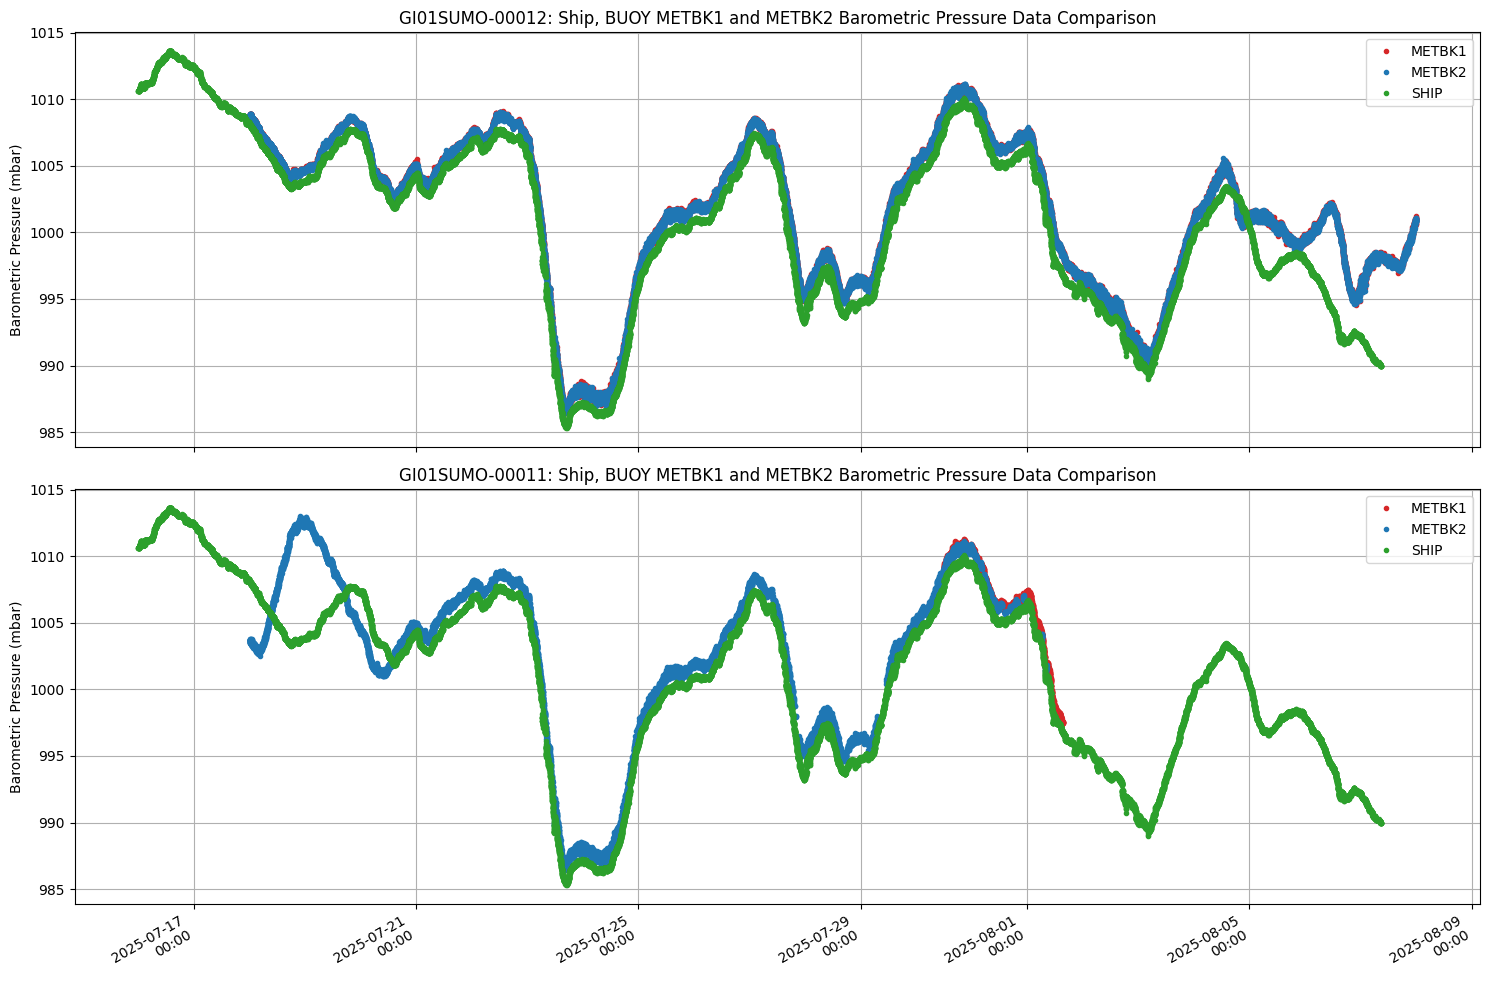

In [10]:
fig, (ax0, ax1) = plt.subplots(
    nrows=2, ncols=1, figsize=(15,10), sharex=True
)

# --- Panel 1 ---
ax0.plot(sumo12.metbk1.index, sumo12.metbk1["BP_mbar"], ".", color="tab:red")
ax0.plot(sumo12.metbk2.index, sumo12.metbk2["BP_mbar"], ".", color="tab:blue")
ax0.plot(ship_data.index,      ship_data["BPZ"],        ".", color="tab:green")
ax0.grid()
ax0.set_ylabel("Barometric Pressure (mbar)")
ax0.set_title("GI01SUMO-00012: Ship, BUOY METBK1 and METBK2 Barometric Pressure Data Comparison") 
ax0.legend(["METBK1","METBK2","SHIP"])

# --- Panel 2 ---
ax1.plot(sumo11.metbk1.index, sumo11.metbk1["BP_mbar"], ".", color="tab:red")
ax1.plot(sumo11.metbk2.index, sumo11.metbk2["BP_mbar"], ".", color="tab:blue")
ax1.plot(ship_data.index,      ship_data["BPZ"],        ".", color="tab:green")
ax1.grid()
ax1.set_ylabel("Barometric Pressure (mbar)")
ax1.set_title("GI01SUMO-00011: Ship, BUOY METBK1 and METBK2 Barometric Pressure Data Comparison")
ax1.legend(["METBK1","METBK2","SHIP"])

# --- Datetime formatting ---
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M"))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

#### Short Wave Radiation

SWZ → corrected short wave radiation value from ship


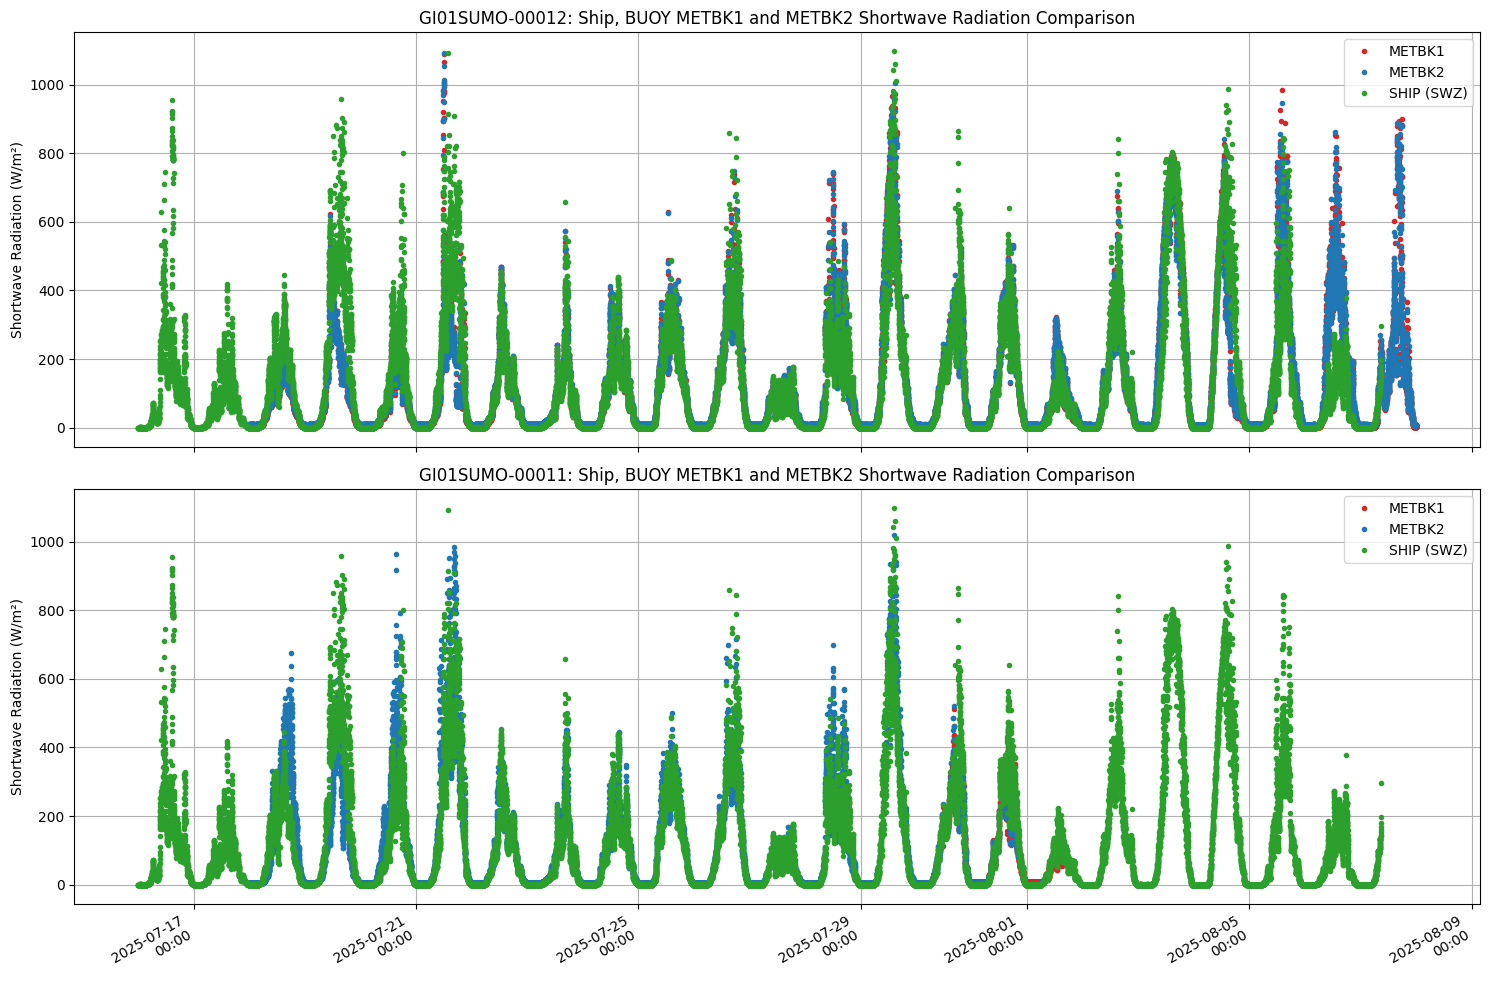

In [11]:
fig, (ax0, ax1) = plt.subplots(
    nrows=2, ncols=1, figsize=(15,10), sharex=True
)

# ===========================
# --- Panel 1: SUMO12 ---
# ===========================
ax0.plot(sumo12.metbk1.index, sumo12.metbk1["SWR_W_m2"], ".", color="tab:red")
ax0.plot(sumo12.metbk2.index, sumo12.metbk2["SWR_W_m2"], ".", color="tab:blue")
ax0.plot(ship_data.index,      ship_data["SWZ"],         ".", color="tab:green")
ax0.grid()
ax0.set_ylabel("Shortwave Radiation (W/m²)")
ax0.set_title("GI01SUMO-00012: Ship, BUOY METBK1 and METBK2 Shortwave Radiation Comparison")
ax0.legend(["METBK1","METBK2","SHIP (SWZ)"])

# ===========================
# --- Panel 2: SUMO11 ---
# ===========================
ax1.plot(sumo11.metbk1.index, sumo11.metbk1["SWR_W_m2"], ".", color="tab:red")
ax1.plot(sumo11.metbk2.index, sumo11.metbk2["SWR_W_m2"], ".", color="tab:blue")
ax1.plot(ship_data.index,      ship_data["SWZ"],         ".", color="tab:green")
ax1.grid()
ax1.set_ylabel("Shortwave Radiation (W/m²)")
ax1.set_title("GI01SUMO-00011: Ship, BUOY METBK1 and METBK2 Shortwave Radiation Comparison")
ax1.legend(["METBK1","METBK2","SHIP (SWZ)"])

# --- Datetime formatting ---
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M"))

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## SAMOS Wind Data Processing

Ship
* Pressure: BPZ
* True wind speed: TWZ
* True wind direction: TIZ

Buoys (METBK1)
* Pressure BP_mbar
* Wind: We_m_s & Wn_m_s

In [18]:
# ============================================================
# 1. SAMOS SHIP: compute true wind from WSB/WSZ, WDB/WDZ
# ============================================================
# ship_data is your SAMOS-format ship dataframe.

# SAMOS variable meanings:
#   WSB : wind speed from anemometer B (m/s)
#   WSZ : wind speed from anemometer Z (m/s)
#   WDB : wind direction from anemometer B (deg, meteorological "from")
#   WDZ : wind direction from anemometer Z (deg, meteorological "from")

ship_data = ship_data.copy()

# Average the two anemometer speeds
ship_data["WS_mean"] = ship_data[["WSB", "WSZ"]].mean(axis=1)

# Average the two meteorological 'from' directions
ship_data["WD_from"] = ship_data[["WDB", "WDZ"]].mean(axis=1)

# Convert met 'from' → vector 'to' direction for md2vect
# (wind FROM 270° is blowing TOWARD 90°)
ship_data["WD_to"] = (ship_data["WD_from"] + 180.0) % 360.0

# Use md2vect to get components.
# md2vect returns: vx = north component, vy = east component
wspd = ship_data["WS_mean"]
wdir_to = ship_data["WD_to"]
wnd_north, wnd_east = md2vect(wspd, wdir_to)

# Store ship true-wind fields for plotting
ship_data["shipTW_N"]       = wnd_north              # northward component (m/s)
ship_data["shipTW_E"]       = wnd_east               # eastward component (m/s)
ship_data["shipTW_speed"]   = wspd                   # true wind speed (m/s)
ship_data["shipTW_dir_to"]  = wdir_to                # direction wind blows *toward* (deg)
ship_data["shipTW_dir_from"] = ship_data["WD_from"]  # original met 'from' (deg)

# For consistency with buoy TW_dir (met convention), use 'from' for plotting:
ship_data["shipTW_dir"] = ship_data["shipTW_dir_from"]


# ============================================================
# 2. SUMO11 / SUMO12: components → met-style speed & direction
# ============================================================
# SUMO metbk1 variable meanings:
#   We_m_s : eastward wind component (m/s, positive toward east)
#   Wn_m_s : northward wind component (m/s, positive toward north)

def add_true_wind_from_components(df, east_col="We_m_s", north_col="Wn_m_s", out_prefix="TW"):
    df = df.copy()
    
    u = df[east_col]   # eastward component (m/s)
    v = df[north_col]  # northward component (m/s)

    # Speed from components
    df[f"{out_prefix}_speed"] = np.sqrt(u**2 + v**2)

    # Meteorological 'from' direction:
    # 0° = from north, 90° = from east, 180° = from south, 270° = from west
    df[f"{out_prefix}_dir"] = (np.degrees(np.arctan2(-u, -v)) + 360.0) % 360.0

    return df

sumo11.metbk1 = add_true_wind_from_components(sumo11.metbk1)
sumo12.metbk1 = add_true_wind_from_components(sumo12.metbk1)

# Quick sanity peek
display(ship_data[["WSB","WSZ","WDB","WDZ","WS_mean","WD_from","WD_to",
                   "shipTW_speed","shipTW_dir"]].head())
display(sumo11.metbk1[["We_m_s","Wn_m_s","TW_speed","TW_dir"]].head())
display(sumo12.metbk1[["We_m_s","Wn_m_s","TW_speed","TW_dir"]].head())

,WSB,WSZ,WDB,WDZ,WS_mean,WD_from,WD_to,shipTW_speed,shipTW_dir
datetime_col,,,,,,,,,
2025-07-16 00:00:00+00:00,1.7,1.698,287.9,270.0,1.6990,278.95,98.95,1.6990,278.95
2025-07-16 00:01:00+00:00,2.2,1.903,299.9,265.0,2.0515,282.45,102.45,2.0515,282.45
2025-07-16 00:02:00+00:00,0.7,0.617,271.0,235.0,0.6585,253.00,73.00,0.6585,253.00
2025-07-16 00:03:00+00:00,1.0,0.977,304.9,242.0,0.9885,273.45,93.45,0.9885,273.45
2025-07-16 00:04:00+00:00,1.6,1.749,301.3,277.0,1.6745,289.15,109.15,1.6745,289.15


,We_m_s,Wn_m_s,TW_speed,TW_dir
datetime,,,,
2025-07-30 11:27:26.229000+00:00,7.95,-0.90,8.000781,276.458816
2025-07-30 11:28:30.466000+00:00,7.21,-1.05,7.286055,278.285797
2025-07-30 11:29:35.113000+00:00,8.06,-1.57,8.211486,281.022567
2025-07-30 11:30:38.602000+00:00,8.48,-1.96,8.703562,283.014354
2025-07-30 11:31:43.374000+00:00,7.81,-1.36,7.927528,279.878191


,We_m_s,Wn_m_s,TW_speed,TW_dir
datetime,,,,
2025-07-18 00:00:05.514000+00:00,-1.48,-0.14,1.486607,84.596209
2025-07-18 00:01:10.214000+00:00,-1.37,-0.04,1.370584,88.327606
2025-07-18 00:02:14.686000+00:00,-1.38,0.00,1.380000,90.000000
2025-07-18 00:02:47.948000+00:00,-1.32,-0.09,1.323065,86.099506
2025-07-18 00:03:52.320000+00:00,-1.15,-0.14,1.158490,83.059017


## Shipboard vs SUMO-11 vs SUMO-12 
### July 23 to July 24

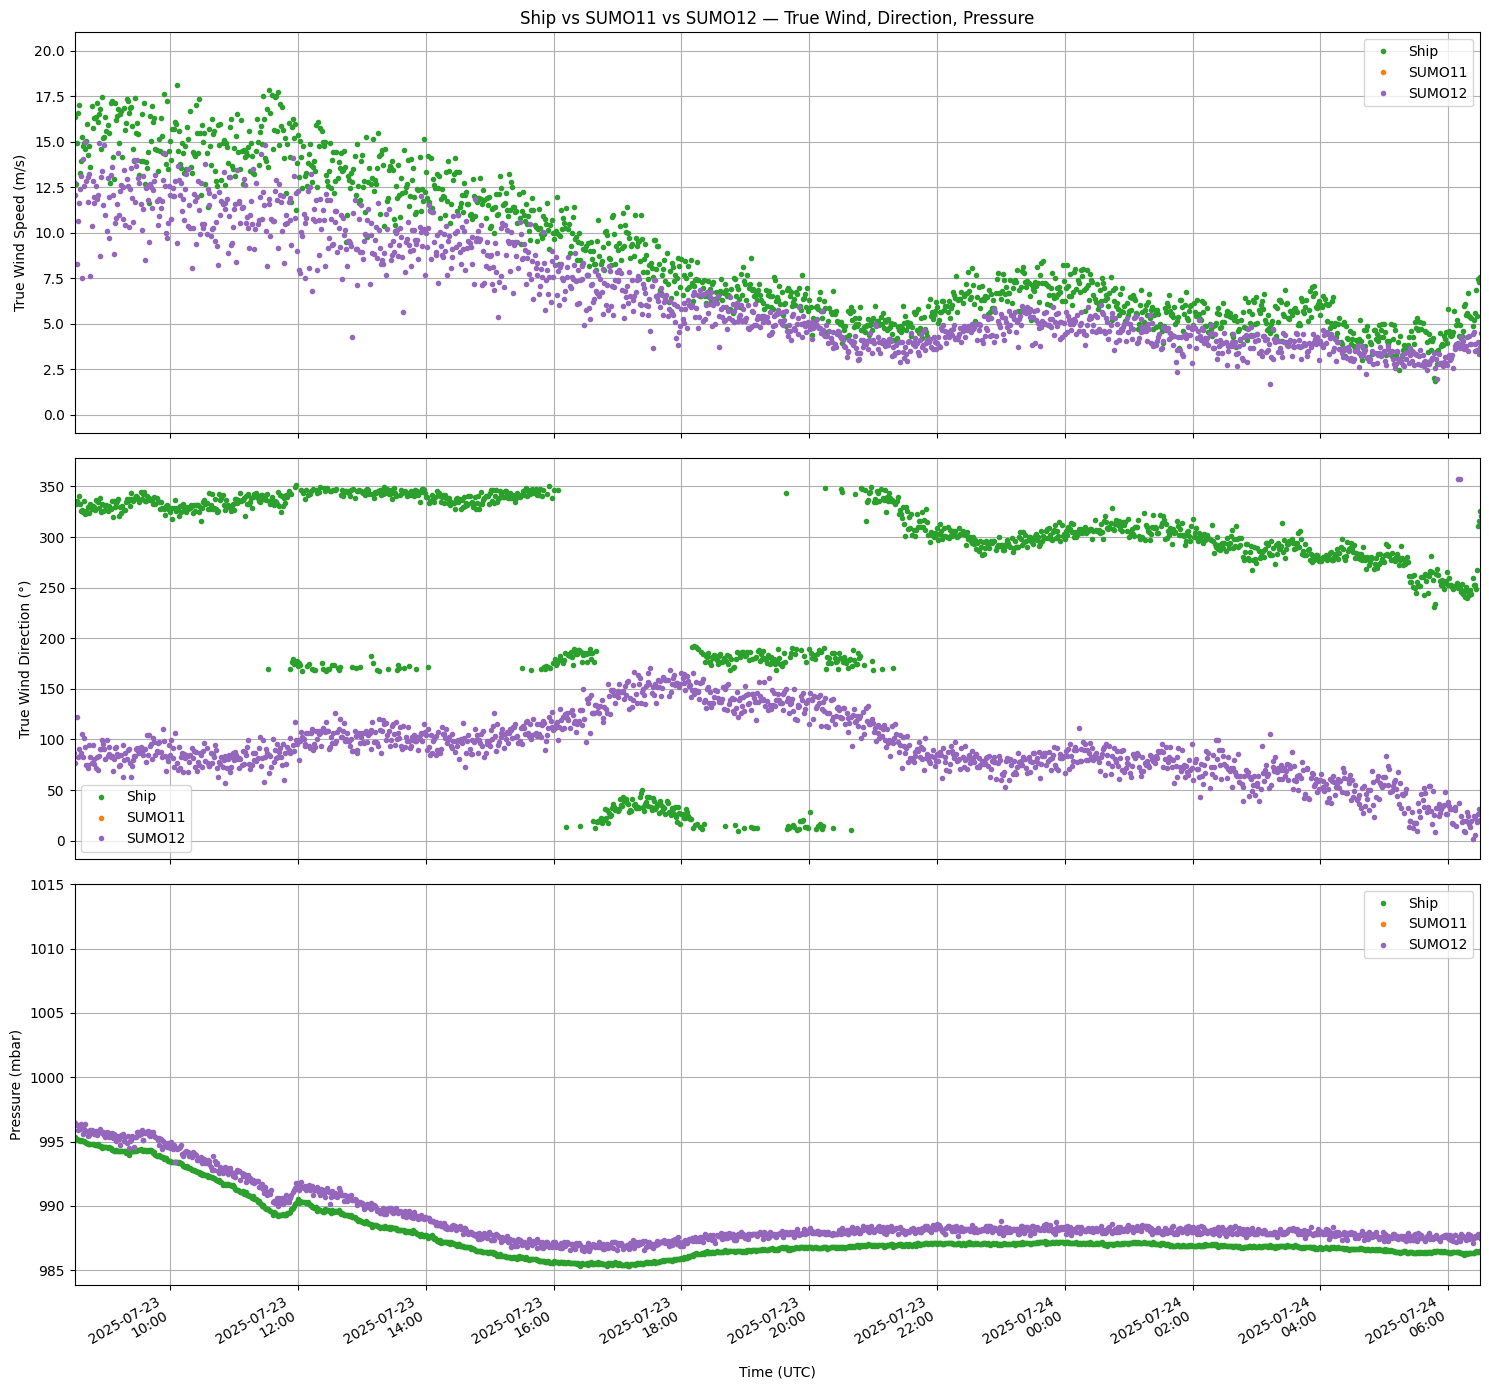

In [21]:
fig, (ax0, ax1, ax2) = plt.subplots(
    nrows=3, ncols=1, figsize=(15, 14), sharex=True
)

# -------------------------------
# Panel 1 — True Wind Speed
# -------------------------------
ax0.plot(ship_data.index,        ship_data["shipTW_speed"], ".", color="tab:green")
ax0.plot(sumo11.metbk1.index,    sumo11.metbk1["TW_speed"], ".", color="tab:orange")
ax0.plot(sumo12.metbk1.index,    sumo12.metbk1["TW_speed"], ".", color="tab:purple")
ax0.set_ylabel("True Wind Speed (m/s)")
ax0.set_title("Ship vs SUMO11 vs SUMO12 — True Wind, Direction, Pressure")
ax0.grid()
ax0.legend(["Ship", "SUMO11", "SUMO12"])

# -------------------------------
# Panel 2 — True Wind Direction
# -------------------------------
ax1.plot(ship_data.index,        ship_data["shipTW_dir"], ".", color="tab:green")
ax1.plot(sumo11.metbk1.index,    sumo11.metbk1["TW_dir"], ".", color="tab:orange")
ax1.plot(sumo12.metbk1.index,    sumo12.metbk1["TW_dir"], ".", color="tab:purple")
ax1.set_ylabel("True Wind Direction (°)")
ax1.grid()
ax1.legend(["Ship", "SUMO11", "SUMO12"])

# -------------------------------
# Panel 3 — Pressure
# -------------------------------
ax2.plot(ship_data.index,        ship_data["BPZ"],        ".", color="tab:green")
ax2.plot(sumo11.metbk1.index,    sumo11.metbk1["BP_mbar"], ".", color="tab:orange")
ax2.plot(sumo12.metbk1.index,    sumo12.metbk1["BP_mbar"], ".", color="tab:purple")
ax2.set_ylabel("Pressure (mbar)")
ax2.set_xlabel("Time (UTC)")
ax2.grid()
ax2.legend(["Ship", "SUMO11", "SUMO12"])

# -------------------------------
# Datetime formatting
# -------------------------------
import matplotlib.dates as mdates
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M"))

# -------------------------------
# Date range limit setting
# -------------------------------
t1 = pd.to_datetime("2025-07-23 08:30", utc=True)
t2 = pd.to_datetime("2025-07-24 06:30", utc=True)

for ax in (ax0, ax1, ax2):
    ax.set_xlim(t1, t2)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()


## Shipboard vs SUMO-11 vs SUMO-12 
### July 25 to July 26

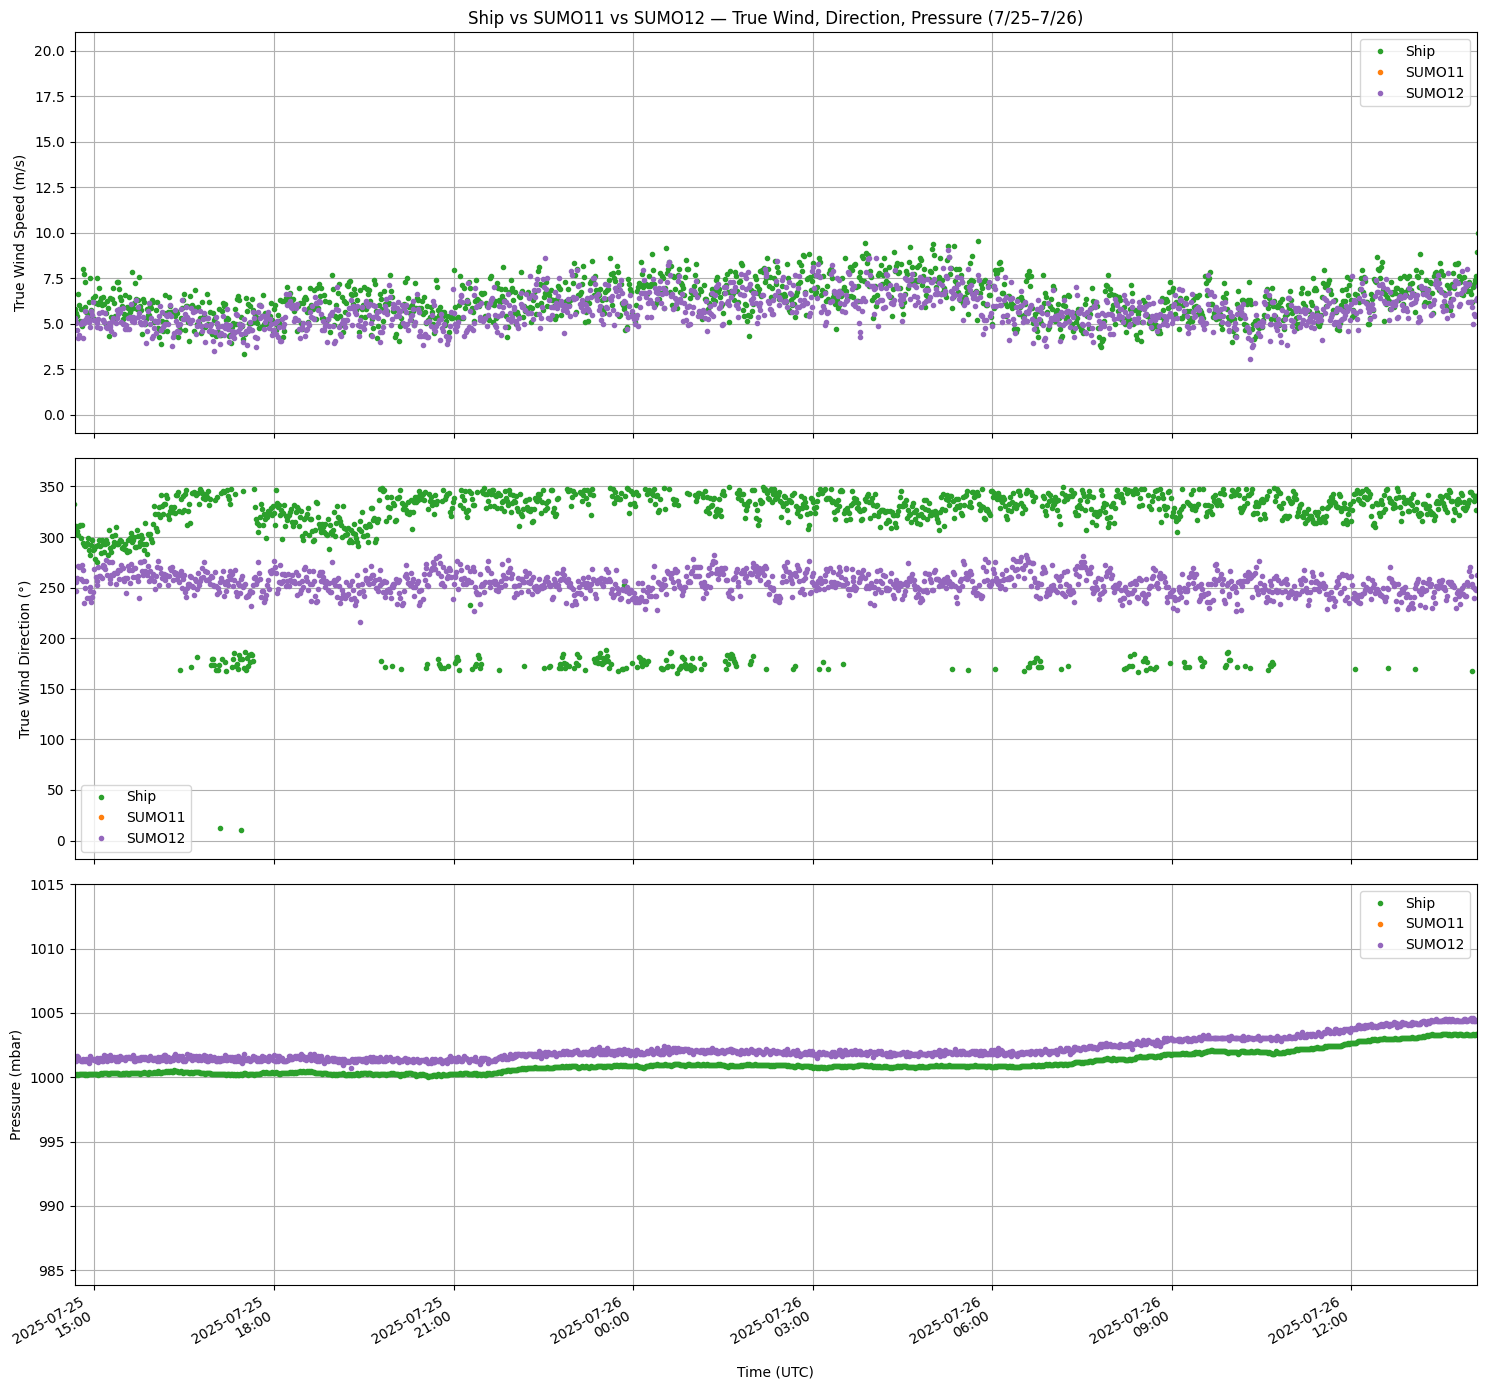

In [20]:
# New time window
t1 = pd.to_datetime("2025-07-25 14:40", utc=True)
t2 = pd.to_datetime("2025-07-26 14:06", utc=True)

fig, (ax0, ax1, ax2) = plt.subplots(
    nrows=3, ncols=1, figsize=(15, 14), sharex=True
)

# ------------------------------------------------
# Panel 1 — True Wind Speed
# (assumes: shipTW_speed, TW_speed already added)
# ------------------------------------------------
ax0.plot(ship_data.index,        ship_data["shipTW_speed"], ".", color="tab:green")
ax0.plot(sumo11.metbk1.index,    sumo11.metbk1["TW_speed"],   ".", color="tab:orange")
ax0.plot(sumo12.metbk1.index,    sumo12.metbk1["TW_speed"],   ".", color="tab:purple")
ax0.set_ylabel("True Wind Speed (m/s)")
ax0.set_title("Ship vs SUMO11 vs SUMO12 — True Wind, Direction, Pressure (7/25–7/26)")
ax0.grid()
ax0.legend(["Ship", "SUMO11", "SUMO12"])

# ------------------------------------------------
# Panel 2 — True Wind Direction
# (assumes: shipTW_dir, TW_dir already added)
# ------------------------------------------------
ax1.plot(ship_data.index,        ship_data["shipTW_dir"], ".", color="tab:green")
ax1.plot(sumo11.metbk1.index,    sumo11.metbk1["TW_dir"],   ".", color="tab:orange")
ax1.plot(sumo12.metbk1.index,    sumo12.metbk1["TW_dir"],   ".", color="tab:purple")
ax1.set_ylabel("True Wind Direction (°)")
ax1.grid()
ax1.legend(["Ship", "SUMO11", "SUMO12"])

# ------------------------------------------------
# Panel 3 — Barometric Pressure
# (ship: BPZ, buoys: BP_mbar)
# ------------------------------------------------
ax2.plot(ship_data.index,        ship_data["BPZ"],        ".", color="tab:green")
ax2.plot(sumo11.metbk1.index,    sumo11.metbk1["BP_mbar"], ".", color="tab:orange")
ax2.plot(sumo12.metbk1.index,    sumo12.metbk1["BP_mbar"], ".", color="tab:purple")
ax2.set_ylabel("Pressure (mbar)")
ax2.set_xlabel("Time (UTC)")
ax2.grid()
ax2.legend(["Ship", "SUMO11", "SUMO12"])

# Datetime formatting
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M"))

# Apply the new 24-hr window just to the plot
for ax in (ax0, ax1, ax2):
    ax.set_xlim(t1, t2)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
